## Group Assignment #2 - Millennium development goals - Chico, Jordi, Sebastián

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1.Load the data from the competition, removing any possible meaningless column.

In [2]:
training_data = pd.read_csv('TrainingSet.csv').drop(columns='Unnamed: 0')
training_data.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


In [3]:
# rename_columns(columns_name)
# columns_name: list with columns name
# returns a list with formatted years and the other column names

def rename_columns(columns_name):
    return [column_name[:4] if "[YR" in column_name else column_name for column_name in columns_name]

In [4]:
training_data.columns = rename_columns(training_data.columns)
training_data.head()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2001,2002,2003,2004,2005,2006,2007,Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


### 2.The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

Splitting Series Code column, getting first element of the array, then adding them to a set to get only uniques values, and calculating the length

In [5]:
len(set(training_data['Series Code'].str.split('.',expand=True).get(0)))

62

### 3.Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

In [6]:
# get_years()
# return list with years as datetime
def get_years():
    return pd.to_datetime(list(training_data)[:len(list(training_data))- 3])

In [7]:
get_years()

DatetimeIndex(['1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01'],
              dtype='datetime64[ns]', freq=None)

In [8]:
# series_by_year_per_country(country)
# country_name: name of the country
# return DataFrame with index=Years, columns=Series Name
def series_by_year_per_country(country):
    data = training_data.loc[training_data['Country Name'] == country]
    if data.empty:
        raise ValueError('There is no Country with that name')
    data = data.drop(columns=['Country Name','Series Code'])
    data = data.set_index('Series Name')
    data = data.transpose()
    data = data.set_index(get_years().year)
    return data

# countries_by_year_per_series(series_name)
# series_name: name of the series
# return DataFrame with inxed=Years, columns=Country Name
def countries_by_year_per_series(series_name):
    data = training_data.loc[training_data['Series Name'] == series_name]
    if data.empty:
        raise ValueError('There is no Series with that name')
    data = data.drop(columns=['Series Name','Series Code'])
    data = data.set_index('Country Name')
    data = data.transpose()
    data = data.set_index(get_years().year)
    return data
    


In [9]:
series_by_year_per_country('United States')

Series Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Achieve universal primary education,"Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),...,"Water pollution, clay and glass industry (% of total BOD emissions)","Water pollution, food industry (% of total BOD emissions)","Water pollution, metal industry (% of total BOD emissions)","Water pollution, other industry (% of total BOD emissions)","Water pollution, paper and pulp industry (% of total BOD emissions)","Water pollution, textile industry (% of total BOD emissions)","Water pollution, wood industry (% of total BOD emissions)","Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100),Women's share of population ages 15+ living with HIV (%)
1972,NaN,NaN,NaN,NaN,NaN,5.501396,4.315783e+12,1.155081e+12,4.378004,20561.530624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.531733,NaN
1973,NaN,NaN,NaN,NaN,NaN,5.741941,4.563593e+12,1.287948e+12,4.737460,21535.624940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.361644,NaN
1974,NaN,NaN,NaN,NaN,NaN,-3.998096,4.381136e+12,1.358711e+12,-4.871232,20486.574688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.944050,NaN
1975,NaN,NaN,0.807367,NaN,NaN,-0.849639,4.343912e+12,1.466083e+12,-1.822444,20113.218373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.620259,NaN
1976,NaN,NaN,NaN,NaN,NaN,5.192781,4.569482e+12,1.631847e+12,4.197952,20957.561687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.089462,NaN
1977,NaN,NaN,NaN,NaN,NaN,4.300948,4.766013e+12,1.817925e+12,3.257176,21640.186362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.119222,NaN
1978,NaN,NaN,NaN,NaN,NaN,5.430354,5.024824e+12,2.051424e+12,4.319140,22574.856296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.849679,NaN
1979,NaN,NaN,NaN,NaN,NaN,-0.084071,5.020600e+12,2.223412e+12,-1.180657,22308.324572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.596335,NaN
1980,NaN,NaN,NaN,NaN,NaN,-1.809500,4.929752e+12,2.394077e+12,-2.747220,21695.465893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.613285,NaN
1981,NaN,NaN,NaN,NaN,NaN,3.362568,5.095519e+12,2.701718e+12,2.353113,22205.984827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.052538,NaN


In [11]:
countries_by_year_per_series('Adjusted net national income (annual % growth)')

Country Name,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,"Venezuela, RB",Vietnam,Zambia,Zimbabwe
1972,NaN,21.475738,NaN,-0.715529,NaN,5.705325,6.589558,NaN,NaN,NaN,...,NaN,NaN,2.623016,5.501396,-1.125212,NaN,NaN,NaN,6.590783,NaN
1973,NaN,4.718686,NaN,5.731270,NaN,5.371589,5.838566,NaN,NaN,NaN,...,NaN,NaN,4.767392,5.741941,-4.158508,NaN,NaN,NaN,-12.905622,NaN
1974,NaN,26.300898,NaN,3.198521,NaN,2.640340,2.286316,NaN,NaN,NaN,...,NaN,NaN,-6.106959,-3.998096,2.929075,NaN,NaN,NaN,9.842705,NaN
1975,NaN,1.913998,NaN,0.323304,NaN,0.784712,-0.311799,NaN,NaN,NaN,...,NaN,NaN,0.479577,-0.849639,1.748012,NaN,25.546961,NaN,-14.180232,NaN
1976,NaN,8.210002,NaN,-3.378993,NaN,2.401618,4.469643,NaN,NaN,NaN,...,NaN,NaN,2.097993,5.192781,4.912213,NaN,11.866161,NaN,-4.858429,NaN
1977,NaN,6.038823,NaN,4.522992,NaN,1.139144,4.360423,NaN,NaN,NaN,...,NaN,NaN,1.029171,4.300948,-0.356586,NaN,9.768020,NaN,-1.240415,-6.599672
1978,NaN,9.027809,NaN,-5.192307,NaN,0.353743,0.310496,NaN,NaN,NaN,...,NaN,NaN,4.471934,5.430354,6.465511,NaN,0.295903,NaN,-8.569654,-2.345194
1979,NaN,-7.312302,NaN,6.229485,NaN,1.319493,5.377748,NaN,NaN,NaN,...,NaN,NaN,-0.730782,-0.084071,7.199967,NaN,-19.752533,NaN,0.740277,3.708165
1980,NaN,25.034974,NaN,4.858352,NaN,3.711461,0.092900,NaN,NaN,NaN,...,NaN,NaN,-1.970691,-1.809500,1.985007,NaN,15.147758,NaN,-1.464005,2.631638
1981,NaN,17.323653,NaN,-7.174673,NaN,4.495766,-1.115576,NaN,NaN,21.154967,...,NaN,NaN,-2.373874,3.362568,6.533812,NaN,10.121435,NaN,3.730786,10.675492


### 4.Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean

In [12]:
# colors(n, cmap)
# n: quantity of colors
# cmap: color map name, available in https://matplotlib.org/examples/color/colormaps_reference.html
# return list of colors
def colors(n, cmap):
    cmap = plt.get_cmap(cmap)
    return [cmap(i) for i in np.linspace(0, 1, n)]

def colors_one(n):
    return colors(n,'YlOrBr')
def colors_two(n):
    return colors(n,'YlOrRd')
def colors_three(n):
    return colors(n, 'rainbow')

In [13]:
# series_with_rolling_mean_by_countries(series_name, years, countries_name, color_values=colors_one, color_rolling=colors_two)
# series_name: name of the series
# years: number of years to calculate rolling mean
# countries_name: list of country names to plot
# color_values: color function to plot the values, default colors_one
# color_rolling: color function to plot the rolling values, default color_two
def series_with_rolling_mean_by_countries(series_name, years, countries_name, color_values=colors_one, color_rolling=colors_two):
    countries = countries_by_year_per_series(series_name)[countries_name]
    rolling = countries.rolling(years, center=True).mean()
    ax = countries.plot(marker='o', linestyle='--', markersize=6, color=color_values(len(countries_name)))
    rolling.plot(color=color_rolling(len(countries_name)), ax=ax, legend=0, figsize=(15,8))
    plt.xlabel('Years')
    plt.ylabel(series_name)
    plt.show()
    

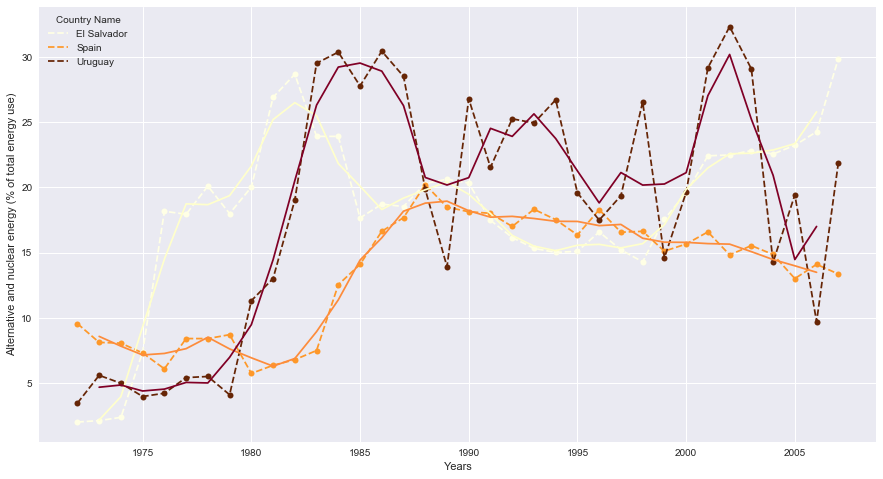

In [14]:
series_with_rolling_mean_by_countries('Alternative and nuclear energy (% of total energy use)', 3,
                                      ['El Salvador', 'Spain','Uruguay']);


### 5.Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

In [15]:
# top_series(data, top_n)
# data: DataFrame from where to find data
# top_n: number of how many largest columns
# return DataFrame of the top_n largest sum for that data
def top_series(data, top_n):
    top_n_columns = data.sum().nlargest(top_n).index
    return data[top_n_columns]

# plot_top_series(data, title, top_n, color=colors_three)
# data: DataFrame to plot
# title: Title of the graph
# top_n: number of items in data
# color: color function to plot the values, default colors_three
def plot_top_series(data, title, top_n, color=colors_three):
    data.plot(color=color(top_n), figsize=(15,8))
    plt.title('Top:'+ str(top_n) + ' ' + title)
    plt.xlabel('Years')
    plt.ylabel(series_name)
    plt.show()


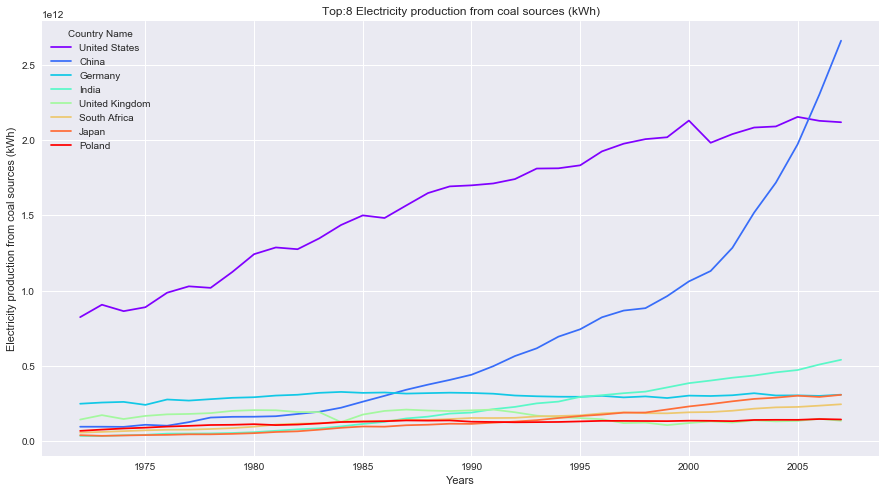

In [16]:
# Variables
series_name = 'Electricity production from coal sources (kWh)'
top_n = 8

data = top_series(countries_by_year_per_series(series_name), top_n)
plot_top_series(data, series_name, top_n);

### 6.Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries

In [17]:
# top_n_with_non_zero_last_y_years(data, top_n, y_years)
# DataFrame from where to find data
# top_n: number of how many largest columns
# y_years: number of how many last years
# return DataSeries of the largest top_n columns percentage increase
def top_n_with_non_zero_last_y_years(data, top_n, y_years):
    data = data.tail(y_years)
    data = data.dropna('columns')
    data = data.T
    data = data.loc[(data > 0.0).all(axis=1)]
    data = data.T
    data = data.pct_change(periods=(y_years - 1)).unstack().nlargest(top_n)
    return data

PERCENTUAL INCREASE
Country Name      
Namibia       2007    9.083333
Chile         2007    1.718122
Argentina     2007    1.503226
Vietnam       2007    1.019898
Malaysia      2007    0.824014
China         2007    0.751248
Turkey        2007    0.656672
Thailand      2007    0.588518
dtype: float64


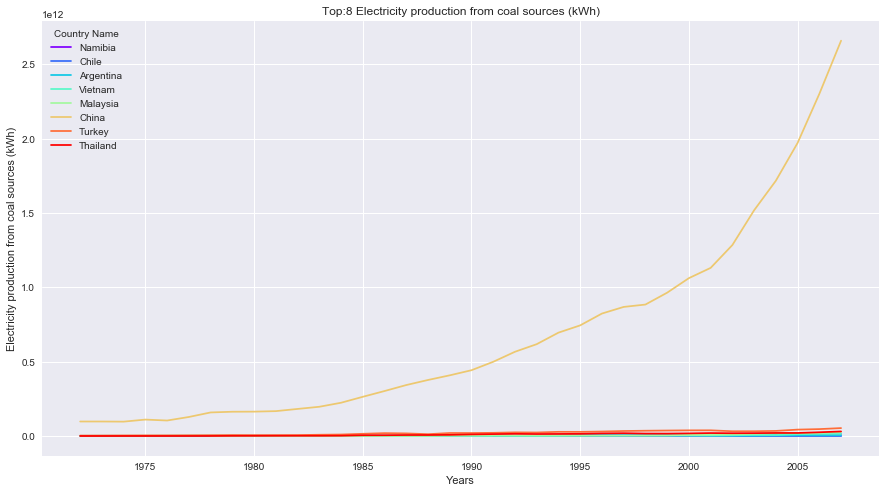

In [18]:
# Variables
series_name = 'Electricity production from coal sources (kWh)'
top_n = 8
years = 5

original_data = countries_by_year_per_series(series_name)
data = top_n_with_non_zero_last_y_years(original_data, top_n, years)
countries = [name for name,_ in data.index]
print('PERCENTUAL INCREASE')
print(data)
plot_top_series(original_data[countries], series_name, top_n, colors_three);



### 7.Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

## Unemployment Rate
We have plotted two graphs to understand the behaviour of unemployment rates.  We consider it to be a key paramater to measure the overall economic health of a population. High unemployement rates for an extended time are indicators of economic recessions or depressions. Furthermore, high rates are associated with other social problems such us drug, alcohol abuse and criminality.

After evaluating this parameter we can say the world is doing better, the graphs clearly prove this statement. In 2007 the world's average unemployment rate reached its lowest level since 1990, showing as well a decreasing trend over the last 4 years (2004-2007).The second graph shows the 5 countries with the greatest unemployement rates. Countries such as Jamaica, Trinidad and Tobago and Barbados that had once reached unemployment rates of +25%, significantly higher than the world average, in 2007 have rates even lower than the world average. 

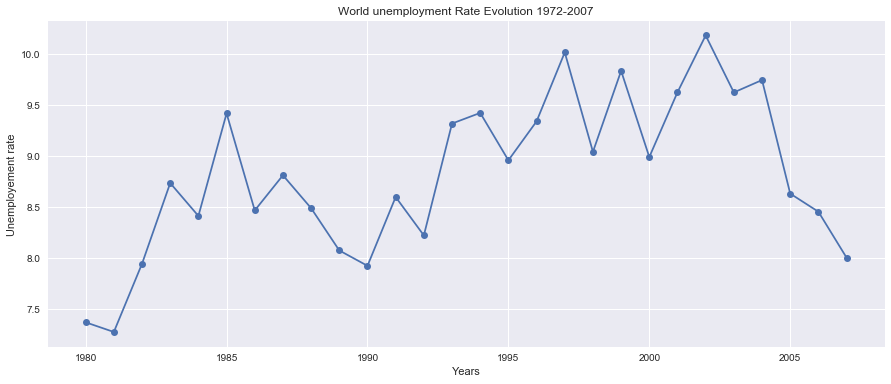

In [19]:
# Evaluating the world average unemployement rate from 1972 to 2007
y = countries_by_year_per_series('Unemployment, total (% of total labor force) (national estimate)')\
.set_index(get_years().year).T.mean()
ax1 = y.plot(marker='o', linestyle='-', figsize= (15,6))
plt.xlabel('Years')
plt.ylabel('Unemployement rate')
plt.title('World unemployment Rate Evolution 1972-2007')
plt.show()

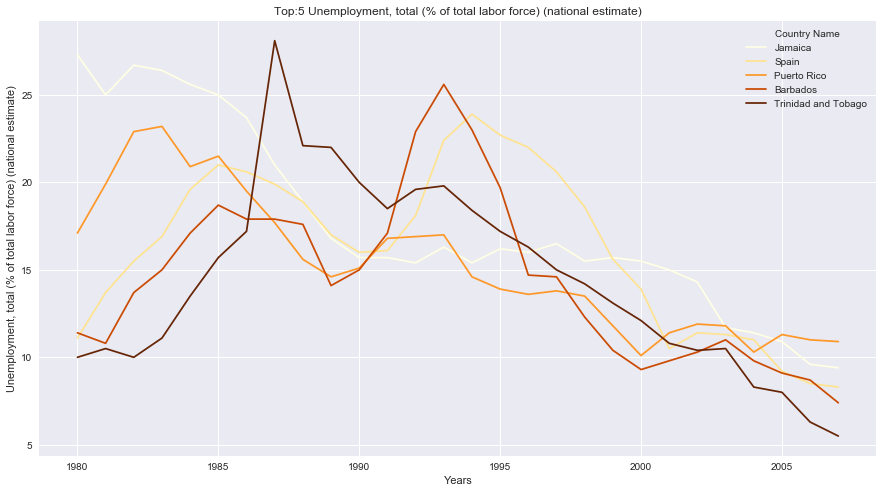

In [20]:
# Evaluating unemployement rate behaviour from 1972 to 2007 from the countries with higher unemployement rates.
series_name = 'Unemployment, total (% of total labor force) (national estimate)'
top_n = 5
data = top_series(countries_by_year_per_series(series_name), top_n)
plot_top_series(data, series_name, top_n, colors_one)


## Gross Domestic Product
With the purpose to measure the wealth development, we have considered the annual percentage growth of the Gross Domestic Product per capita, a relevant indicator to tackle how the world is yearly evolving considering populations.
Taking into account the global outlook, we can see some ups and downs until the beginning of the 21st century. Since then, there is an upward trend which gives room for optimism.
Considering individual performances we see that the top countries represented correspond to different continents, therefore the country wealth growth is spread worldwide

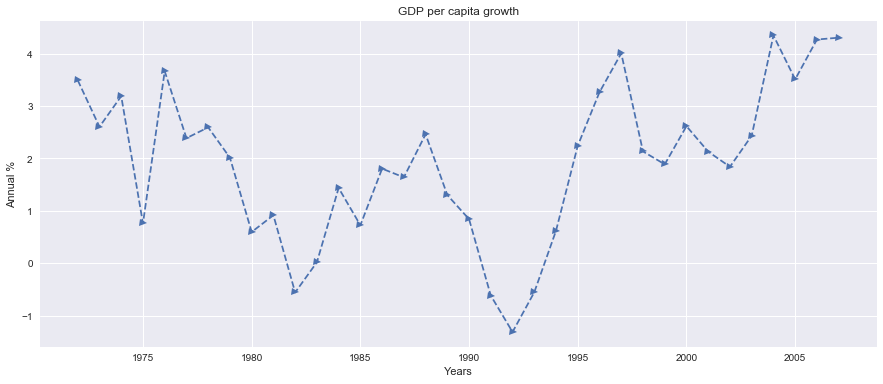

In [21]:
y = countries_by_year_per_series('GDP per capita growth (annual %)')\
.set_index(get_years().year).T.mean()
ax1 = y.plot(marker='>', linestyle='--', figsize= (15,6))
plt.xlabel('Years')
plt.ylabel('Annual %')
plt.title('GDP per capita growth')
plt.show()

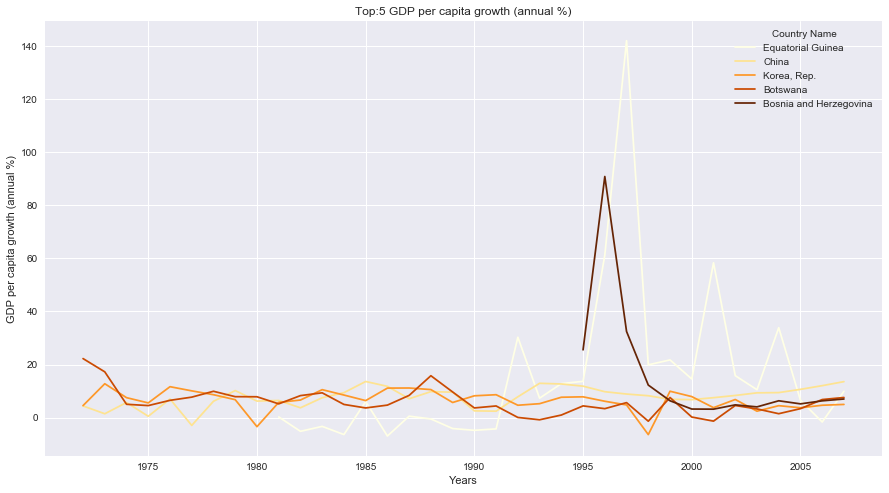

In [22]:
series_name = 'GDP per capita growth (annual %)'
top_n = 5
data = top_series(countries_by_year_per_series(series_name), top_n)
plot_top_series(data, series_name, top_n, colors_one);

## Conclusion
Globally, the world has positively evolved. Two key indicators like the Unemployment rate and the Gross Domestic Product, both show us a trend for hope and optimism. We can back this statement, not only with a global analysis, but also considering the most relevant countries for each variable.